In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('../data/regional_multivariate_data.csv')


enc = pd.read_csv('../data/regional_datasets/multivariate/enc_data_multi.csv').drop(columns = 'Unnamed: 0')
esc = pd.read_csv('../data/regional_datasets/multivariate/esc_data_multi.csv').drop(columns = 'Unnamed: 0')
midatl = pd.read_csv('../data/regional_datasets/multivariate/mid_atlantic_data_multi.csv').drop(columns = 'Unnamed: 0')
mount = pd.read_csv('../data/regional_datasets/multivariate/mountain_data_multi.csv').drop(columns = 'Unnamed: 0')
# ne = pd.read_csv('../data/regional_datasets/univariate/new_england_data_univ.csv').drop(columns = 'Unnamed: 0')
# pac = pd.read_csv('../data/regional_datasets/univariate/pacific_data_univ.csv').drop(columns = 'Unnamed: 0')
# satl = pd.read_csv('../data/regional_datasets/univariate/south_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
# wnc = pd.read_csv('../data/regional_datasets/univariate/wnc_data_univ.csv').drop(columns = 'Unnamed: 0')
# wsc = pd.read_csv('../data/regional_datasets/univariate/wsc_data_univ.csv').drop(columns = 'Unnamed: 0')

def prepare_and_split_data(data, test_size = 0.15):

    # copy data and ensure sorted by date
    data = data.copy() 
    data = data.sort_values(by = 'date')

    # This removes the first n observations so that there are no NaNs in the lag columns
    last_nan = data[data.isna().any(axis = 1)].tail(1).index.item()
    data = data[(last_nan + 1):]


    X = data.drop(['new_confirmed', 'region', 'date'], axis=1)
    y = data['new_confirmed']
    dates = data['date']

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test, dates

In [53]:
Xtrain, Xtest, ytrain, ytest, dates = prepare_and_split_data(enc)

param_grid = {

    'learning_rate': [0.1, 0.2, 0.3],

    'max_depth': [2, 3, 8, 9],

    'subsample': [0.4, 0.5, 0.6],

    'n_estimators': [10, 50, 100, 200]

}

grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=3)

grid_search.fit(Xtrain, ytrain)

best_params = grid_search.best_params_

print("Optimal parameter values =", best_params)
print("Optimal cross validation R-squared = ", grid_search.best_score_)

xgb_model = XGBRegressor(**best_params)

xgb_model.fit(Xtrain, ytrain)


Optimal parameter values = {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6}
Optimal cross validation R-squared =  0.6620619696420631


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8

>5 10780.842 (3699.477)


/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core imp

>10 10072.938 (3141.550)
>50 10415.452 (2189.096)
>100 10406.668 (2193.477)


/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


>500 10406.791 (2193.010)
>1000 10406.781 (2193.001)
>2000 10406.761 (2192.981)
>5000 10406.702 (2192.923)


Text(0.5, 0, 'Number of trees')

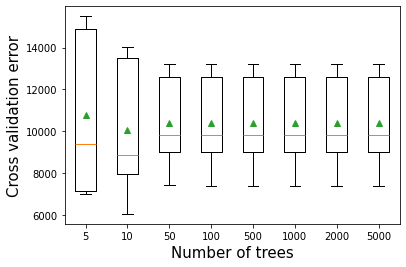

In [44]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [5, 10, 50, 100, 500, 1000, 2000, 5000]
    for n in n_trees:
        models[str(n)] = xgb.XGBRegressor(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, Xtrain, ytrain)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

>1 9622.426 (2832.973)
>2 8278.236 (2805.605)
>3 9321.741 (2530.401)
>4 9747.383 (2605.637)
>5 9912.756 (3093.914)
>6 9502.760 (2608.461)
>7 9518.810 (2687.430)
>8 9701.470 (2788.744)
>9 9457.466 (2683.770)
>10 9716.275 (2693.121)
>11 9614.561 (2670.287)
>12 9691.033 (2772.039)
>13 9623.905 (2699.551)
>14 9686.430 (2710.150)
>15 9644.476 (2704.663)
>16 9669.755 (2680.334)
>17 9641.607 (2688.557)
>18 9668.753 (2680.846)
>19 9658.130 (2697.674)
>20 9662.068 (2703.395)


Text(0.5, 0, 'Depth of each tree')

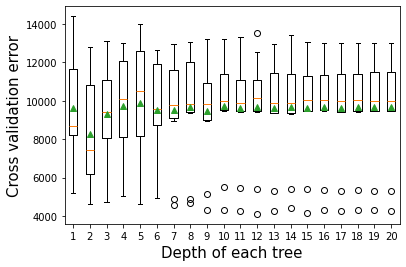

In [46]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,21):
        # define ensemble model
        models[str(i)] = xgb.XGBRegressor(random_state=1,max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, Xtrain, ytrain)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>0.0100 13101.9 (3723.1)
>0.0500 9311.2 (2604.7)
>0.1000 9155.9 (2207.8)
>0.2000 8753.3 (2186.1)
>0.3000 9502.8 (2608.5)
>0.4000 9978.3 (2410.3)
>0.5000 9854.6 (3296.8)
>0.6000 10622.7 (3719.3)
>0.8000 10744.3 (2918.9)
>1.0000 11456.2 (3244.5)


Text(0.5, 0, 'Learning rate')

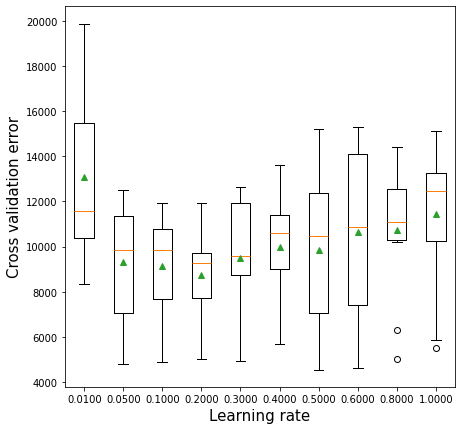

In [47]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(learning_rate=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, Xtrain, ytrain)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

>0.0000 10496.6 (3284.5)
>0.5000 9464.4 (3007.0)
>1.0000 9502.8 (2608.5)
>1.5000 9508.8 (2649.1)
>2.0000 8939.1 (2277.9)
>10.0000 8912.2 (2757.0)
>100.0000 8812.6 (2746.4)
>200.0000 9256.6 (3023.2)
>500.0000 10724.4 (3920.0)


Text(0.5, 0, 'reg_lambda')

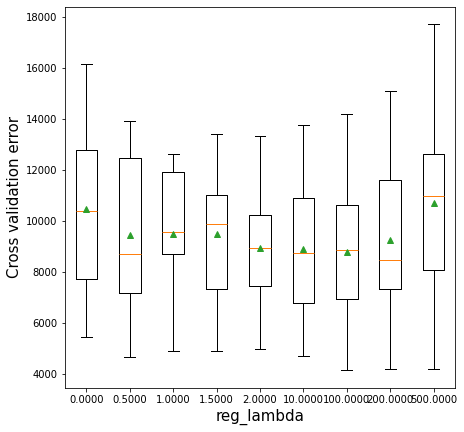

In [49]:
def get_models():
    models = dict()
    # explore 'reg_lambda' from 0.1 to 2 in 0.1 increments
    for i in [0,0.5,1.0,1.5,2,10,100, 200, 500]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(reg_lambda=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, Xtrain, ytrain)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('reg_lambda',fontsize=15)

>0.0000 9502.8 (2608.5)
>10.0000 9505.5 (2608.4)
>100.0000 9501.3 (2610.1)
>1000.0000 9511.8 (2615.8)
>10000.0000 9500.4 (2603.0)
>100000.0000 9504.5 (2613.2)
>1000000.0000 9457.3 (2630.6)
>10000000.0000 9300.2 (2710.6)
>100000000.0000 9354.9 (2699.1)
>1000000000.0000 9320.6 (2626.3)


Text(0.5, 0, 'gamma')

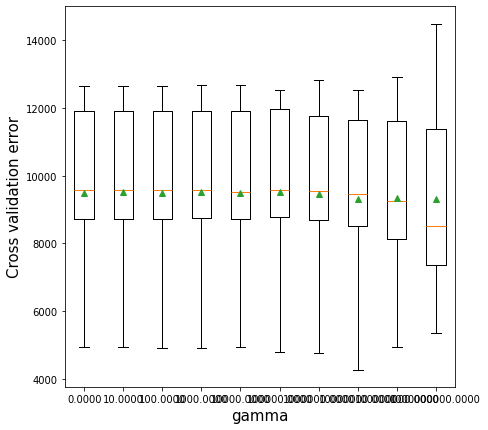

In [50]:
def get_models():
    models = dict()
    # explore gamma from 0.1 to 2 in 0.1 increments
    for i in [0,10,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(gamma=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, Xtrain, ytrain)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('gamma',fontsize=15)

>0.2000 11493.2 (3032.4)
>0.3000 9744.3 (2514.1)
>0.4000 9313.0 (2293.6)
>0.5000 9004.0 (2721.7)
>0.6000 9357.6 (2641.0)
>0.7000 9969.5 (3187.8)
>0.8000 9960.7 (2372.8)
>0.9000 9353.0 (2260.6)
>1.0000 9502.8 (2608.5)


Text(0.5, 0, 'gamma')

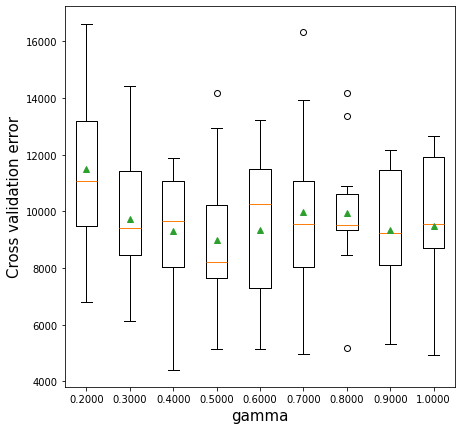

In [52]:
def get_models():
    models = dict()
    # explore subsample 
    for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(subsample=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, Xtrain, ytrain)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('gamma',fontsize=15)

In [54]:
predictions = xgb_model.predict(Xtest)

mae = mean_absolute_error(ytest, predictions)

rmse = np.sqrt(mean_squared_error(ytest, predictions))

mse = mean_squared_error(ytest, predictions)

# Calculate MASE
naive = ytest[:-1]
naive_mae = mean_absolute_error(ytest[1:], naive)
mase = mae / naive_mae

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MASE: {mase}")


MAE: 3521.0392367340796
RMSE: 7158.009084310325
MSE: 51237094.05106914
MASE: 0.17565926731060297


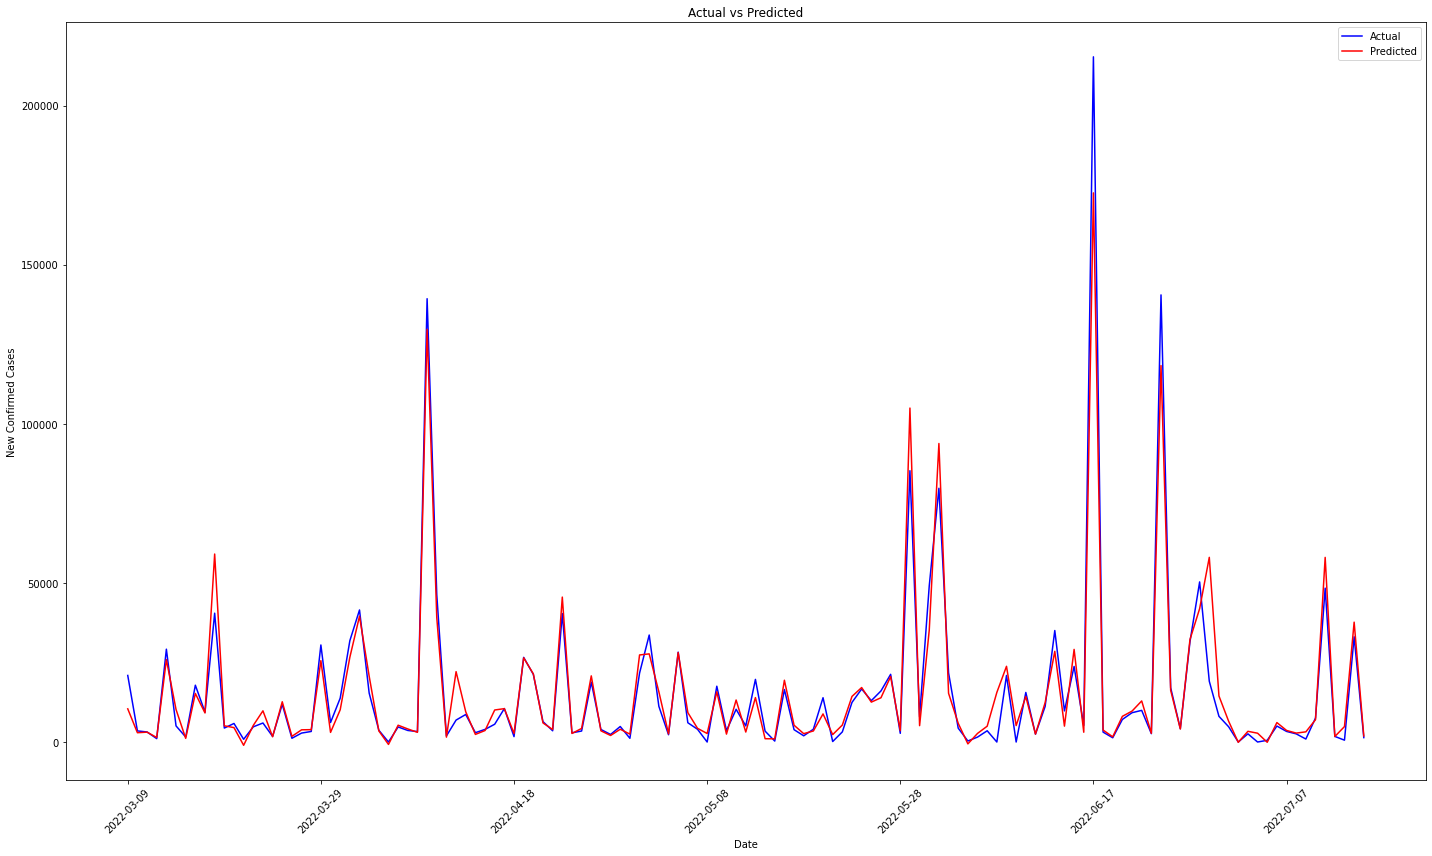

In [55]:
date_idx = len(dates) - len(predictions)
test_dates = dates[date_idx:]
y_test_series = pd.Series(ytest.values, index=test_dates)  

plot = pd.DataFrame({
    'Actual': y_test_series,
    'Predicted': predictions
}, index=test_dates) 

plt.figure(figsize=(20, 12))  
plot['Actual'].plot(label='Actual', color='blue')
plot['Predicted'].plot(label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Feature importances:
current_hospitalized_patients: 0.3157442510128021
7_day_shift: 0.19860683381557465
new_persons_fully_vaccinated_janssen: 0.04660455137491226
current_intensive_care_patients: 0.03388993814587593
cumulative_confirmed: 0.02957266755402088
new_hospitalized_patients: 0.02956465817987919
relative_humidity: 0.02846684865653515
new_vaccine_doses_administered_pfizer: 0.026261955499649048
contact_tracing: 0.02620254084467888
facial_coverings: 0.024945812299847603
2_day_shift: 0.024873986840248108
1_day_shift: 0.0233182180672884
rainfall_mm: 0.020193662494421005
7_day_avg: 0.018030798062682152
new_deceased: 0.017314700409770012
income_support: 0.014330108650028706
new_vaccine_doses_administered: 0.013231591321527958
school_closing: 0.009977666661143303
average_temperature_celsius: 0.009861410595476627
dew_point: 0.009709849953651428
minimum_temperature_celsius: 0.008723927661776543
new_vaccine_doses_administered_moderna: 0.00790134072303772
new_persons_fully_vaccinated_modern

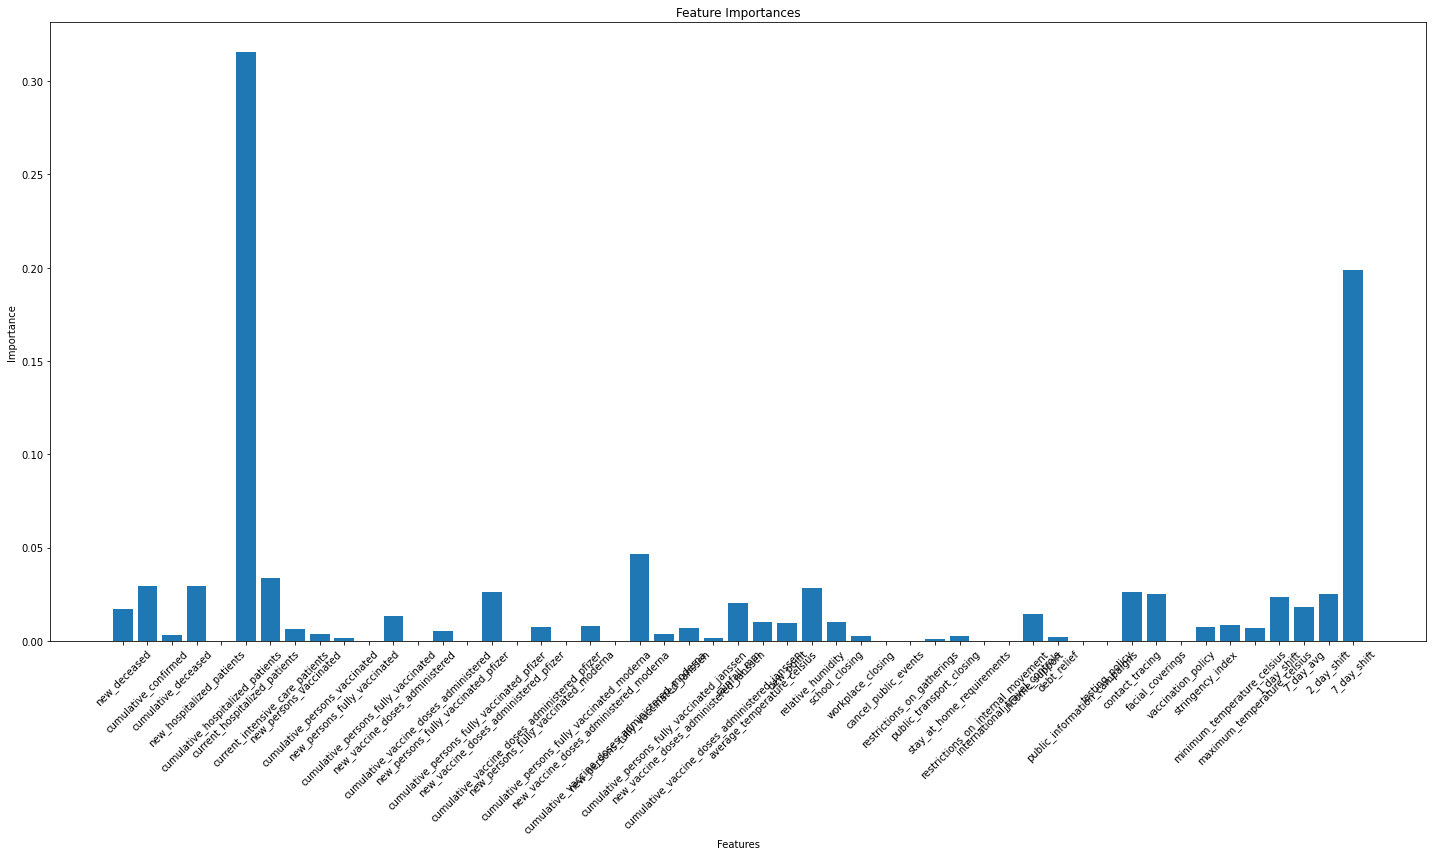

In [58]:
feature_importances = xgb_model.feature_importances_

# Assuming Xtrain is a pandas DataFrame and you want to print feature importance
feature_names = Xtrain.columns
importance_dict = dict(zip(feature_names, feature_importances))

# Print the feature importance
print("Feature importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{feature}: {importance}")

# If you want to visualize the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xticks(rotation=45)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()